<a href="https://colab.research.google.com/github/Siwenli0615/General/blob/main/Laboration2%20FactionWar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import random
import matplotlib.pyplot as plt

class Faction:


    def __init__(self,name:str,apples:int,oranges:int,bananas:int,strawberries:int):
      # använder en for loop för att granska alla tal-baserad argumenter (frukterna)
      fruits = {"apples":apples,"oranges":oranges,"bananas":bananas,"strawberries":strawberries}
      for key,value in fruits.items():
        if not isinstance(value,int):
          raise TypeError(f'{key} needs to be a number')
        if not (0<=value<=200):
          raise ValueError(f"The limit of amount of {key} can only be between 0-200 ({value} provided)")
      if not isinstance(name,str):
        raise TypeError("Name needs to be a string")

      self.__name = name
      self.__apples = apples
      self.__oranges = oranges
      self.__bananas = bananas
      self.__strawberries = strawberries

    @property
    def name(self):
      return self.__name
    @property
    def apples(self):
      return self.__apples
    @property
    def oranges(self):
      return self.__oranges
    @property
    def bananas(self):
      return self.__bananas
    @property
    def strawberries(self):
      return self.__strawberries




    def __repr__(self)->str:
      #visar exakt samma mening som frågat i upppgiften
      text = f"faction(name='{self.__name}',apples={self.__apples}, oranges={self.__oranges}, bananas={self.__bananas}, strawberries={self.__strawberries})"
      return text




    def inventory(self)->int:
      total_fruits = self.__apples + self.__oranges + self.__bananas + self.__strawberries
      return total_fruits




    def status(self):
      total_frukt = self.inventory()
      if total_frukt <= 150:
        print(f"This aint nothin but a scratch! {self.__name} might be struggling for the moment, but will be back with vengance! (strength:{total_frukt})")
      elif (150<total_frukt<=500):
        print(f"The proud {self.__name} is VERY eager to toss some apples! Where are the opponents?! (strength:{total_frukt})")
      elif 500<total_frukt:
        print(f"{self.__name} is GODLIKE! Their position is super dominant! (strength:{total_frukt})")
      elif total_frukt == 0:
        print(f"{self.name} is eliminated.")



    def alter_stock_value(self,fruit:str,stock:int):
      possible_fruits = ("apples","oranges","bananas","strawberries") # skall endast acceptera mellan de 4 sorter frukter
      fruit = fruit.lower().strip()                  # ta bort risken för stora bokstav och mellanslag
      if not isinstance(fruit,str):                  # samma kontroll som initialiseringen
        raise TypeError("Fruit should be in text (string)")
      elif fruit not in possible_fruits:
        raise ValueError(f"{fruit} not found in inventory (apples/oranges/bananas/strawberries)")
      if not isinstance(stock,int):
        raise TypeError(f"The amount of {fruit} need to be a number (integer)")
      elif not (0<=stock<=200):
        raise ValueError(f"The amount of {fruit} need to be between 0-200")
      attribute_name = f'_Faction__{fruit}'             # skulle fungera med 4 if-satser, men jag tyckte
      setattr(self,attribute_name,stock)              # att det är bra att lära sig en metod som kan ta många attributer



    def visualize_resources(self):
      fruits = ['apples','oranges','bananas','strawberries']
      fruit_amounts = [self.__apples,self.__oranges,self.__bananas,self.__strawberries]

      colors = []
      max_value = 200
      for amount in fruit_amounts:
        if amount >= 100:
            colors.append('green')
        elif 50 < amount <= 100:
            colors.append('orange')
        else:
            colors.append('red')

      x_values = fruits
      y_values = fruit_amounts
      # Vill ha snyggare utseende, därför hittade nedan lösningar på nätet:
      # Create an array of 200s for shadow bars
      shadow_values = [max_value] * len(fruits)
      # Create the figure and axis objects
      fig, ax = plt.subplots()
      # Plot the shadow bars with constant value 200
      ax.barh(x_values, shadow_values, color='lightgray', label='Max Amount (200)', alpha=0.5)

      # Plot the actual fruit amounts in front of the shadow bars
      bars = ax.barh(x_values, y_values, color=colors, label='Current Amount')



      plt.title(f"Resourses for faction {self.name}")
      plt.xlabel("Resourses")

      #showing the value of each fruit:
      for i, bar in enumerate(bars):
          value = y_values[i]
          ax.text(value, i, str(value), va='center')
      # Show the chart
      plt.show()



    def organical_growth(self):
      # Tar fram nuvarande namn och antal på frukterna
      fruits = ['apples','oranges','bananas','strawberries']
      fruit_amounts = [self.__apples,self.__oranges,self.__bananas,self.__strawberries]
      if self.inventory() ==0:
        return (f"{self.name} is eliminated and can not gain any more growth")

      for fruit,amount in zip(fruits,fruit_amounts):
        growth = random.randint(1,5)
        if amount < 200:            # Tillväxt skall endast var när den är under 200
          new_amount = amount + growth
          if new_amount >200:         # Om det blir över 200 efter tillväxten, ställ om till 200
            amount = 200
            print(f"Glorious {self.name} has harvested {growth} apples, to a new total of 200! (max limit reached)")
          else:
            amount = new_amount       # annars vanlig tillväxt
            print(f"Glorious {self.name} has harvested {growth} apples, to a new total of {amount}!")


        elif amount == 200:           # om full (200) från början:
          print(f"Glorious {self.name} is already at maximum capacity for apples!")
        self.alter_stock_value(fruit,amount)

      self.visualize_resources()           # visar en bild också :)


    def __mul__(self, other):
      # grundvärde från uppgiften
      success_rate = 100   # 70% chance for a successful attack
      pillage_rate = 20   # 20% resource transfers to the attacker if win
      crit_rate = 10     # 10% chance for crit
      pillage_rate_crit = 40 # 40% resource transfers if win with crit

      # ladda ner befintlig värde av self och other
      fruits = ['apples','oranges','bananas','strawberries']
      self_fruit_amounts = [self.__apples,self.__oranges,self.__bananas,self.__strawberries]
      other_fruit_amounts = [other.__apples,other.__oranges,other.__bananas,other.__strawberries]

      # ifall försvarare är svag (total frukt<5):
      if other.inventory() < 5:
        final_blow = input(f"There is no GLORY in kicking down on an opponent already brought to its knees, make a final blow? (y/n)").lower().strip()
        if final_blow == "y":
          if random.randint(1,100)<100:
            print(f"{self.name} made a successful final blow and stole all {other.inventory()} fruits {other.name} had left, {other.name} is now eliminated")
            result_self = []
            for amount_self,amount_other in zip(self_fruit_amounts,other_fruit_amounts):
              if amount_self < 200:
                new_amount_self = amount_self + amount_other
                if new_amount_self > 200:
                  amount_self = 200
                else:
                  amount_self = round(new_amount_self)
                result_self.append(amount_self)
              elif amount_self == 200:
                result_self.append(200)

            for fruit in fruits:        # set defender resource to zero
              other.alter_stock_value(fruit,0)
            return
          else:
            print(f"{other.name} survived the blow and the game continues")
            return
        else:
          print(f"The turn ends")
          return


      outcome = random.randint(1,100)

      print(f"outcome:{outcome}")

      if outcome < success_rate:
        # om attacken är critical:
        if random.randint(1,100)<=crit_rate:
          print(f"The attack was successful and {self.name} made a critial attack!")
          # beräkna loot critical:
          result_self = []
          other_new_amount = [x*(100-pillage_rate_crit)/100 for x in other_fruit_amounts]

          for amount_self,amount_other in zip(self_fruit_amounts,other_fruit_amounts):
            if amount_self < 200:
              new_amount_self = amount_self + amount_other*pillage_rate_crit/100
              if new_amount_self > 200:
                amount_self = 200
              else:
                amount_self = round(new_amount_self)
              result_self.append(amount_self)
            elif amount_self == 200:
              result_self.append(200)
        else:
          print(f"The attack was successful.")
          # beräkna loot vanlig attack:
          result_self = []
          other_new_amount = [x*(100-pillage_rate)/100 for x in other_fruit_amounts]

          for amount_self,amount_other in zip(self_fruit_amounts,other_fruit_amounts):
            if amount_self < 200:
              new_amount_self = amount_self + amount_other*pillage_rate/100
              if new_amount_self > 200:
                amount_self = 200
              else:
                amount_self = round(new_amount_self)
              result_self.append(amount_self)
            elif amount_self == 200:
              result_self.append(200)

        # real loot (attackerarens riktig vinst):

        loot = [round((new-old)) for new,old in zip(result_self,self_fruit_amounts)]
        fruits = ['apples','oranges','bananas','strawberries']
        print(f"{self.name} looted {loot[0]} {fruits[0]},{loot[1]} {fruits[1]},{loot[2]} {fruits[2]} and {loot[3]} {fruits[3]}")
        # updatera nya värde av frukterna för self och other:
        for fruit,value in zip(fruits,result_self):
          self.alter_stock_value(fruit,round(value))

        for fruit,value in zip(fruits,other_new_amount):
          other.alter_stock_value(fruit,round(value))


      else:
        print(f"{other.name}have defended skillfully, {self.name} failed in the attack and did not gain anything from {other.name}")





outcome:81
The attack was successful.
Fire Nation looted 27 apples,6 oranges,12 bananas and 7 strawberries
apples self: 177
apples other: 107


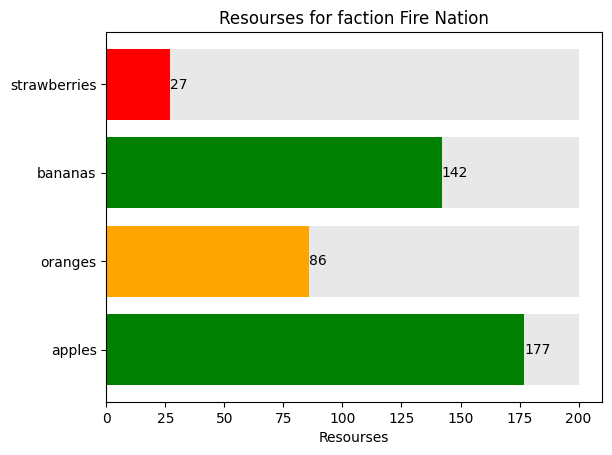

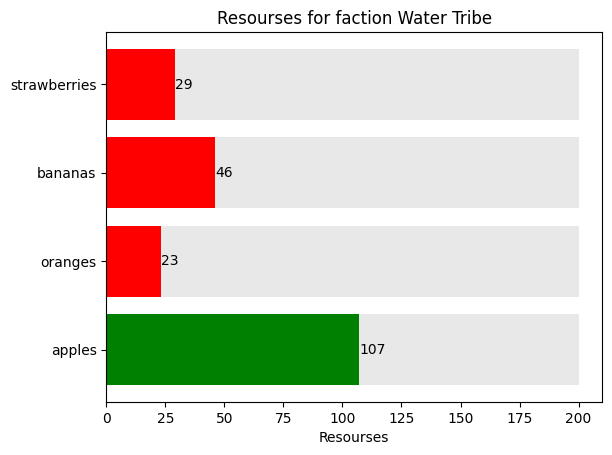

In [97]:
fire_nation = Faction('Fire Nation', 150, 80, 130, 20)
earth_kingdom = Faction('Earth Kingdom', 0, 1, 0, 2)
water_tribe = Faction('Water Tribe', 134, 29, 58, 36)
air_nomads = Faction('Air Nomads', 64, 48, 162, 57)

fire_nation * water_tribe
#earth_kingdom.inventory()
#earth_kingdom.organical_growth()

In [ ]:
def victory():

    return True
  else:
    return False

victory()

False

In [ ]:
fire_nation = Faction('Fire Nation', 199, 80, 20, 200)
#fire_nation.organical_growth()
fire_nation.inventory()

499

In [ ]:
fire_nation = Faction('Fire Nation', 200, 80, 20, 200)
print(fire_nation.apples)
fire_nation.alter_stock_value("apples",150)
print(fire_nation.apples)

200
150


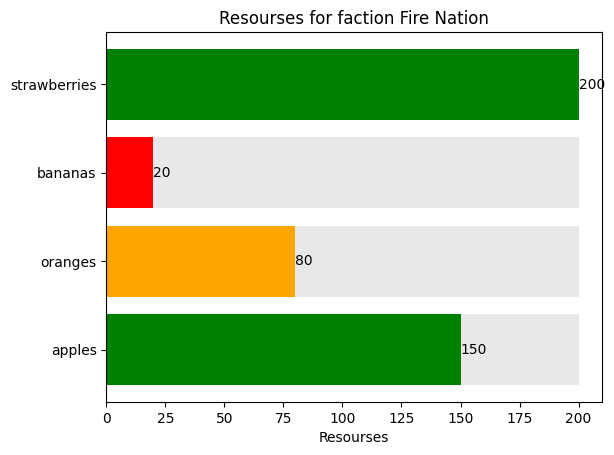

new apples: 200


In [ ]:
fire_nation = Faction('Fire Nation', 150, 80, 20, 200)



fire_nation.visualize_resources()

fire_nation.alter_stock_value('apples',200)
print(f"new apples: {fire_nation.apples}")

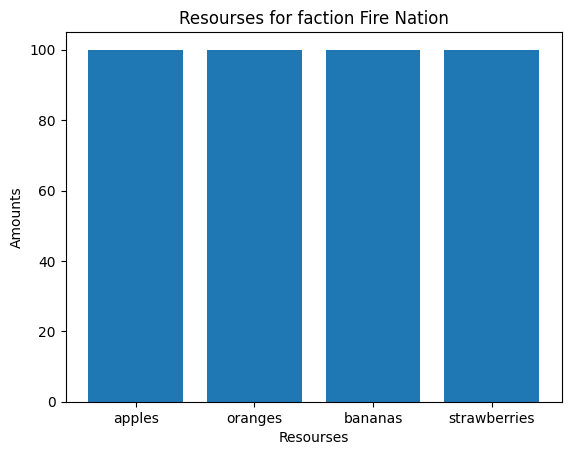

In [ ]:
fire_nation = Faction('Fire Nation', 100, 100, 100, 100)
earth_kingdom = Faction('Earth Kingdom', 0, 0, 0, 0)
water_tribe = Faction('Water Tribe', 100, 100, 100, 100)
air_nomads = Faction('Air Nomads', 100, 100, 100, 100)



In [ ]:
print(fire_nation)
print(earth_kingdom)
print(water_tribe)
print(air_nomads)

faction(name='Fire Nation',apples=100, oranges=100, bananas=100, strawberries=100)
faction(name='Earth Kingdom',apples=0, oranges=0, bananas=0, strawberries=0)
faction(name='Water Tribe',apples=100, oranges=100, bananas=100, strawberries=100)
faction(name='Air Nomads',apples=100, oranges=100, bananas=100, strawberries=100)


In [ ]:
test = fire_nation.inventory()
print(test)
print(fire_nation.apples)
fire_nation.status()
earth_kingdom.status()

400
100
The proud Fire Nation is VERY eager to toss some apples! Where are the opponents?! (strength:400)
This aint nothin but a scratch! Earth Kingdom might be struggling for the moment, but will be back with vengance! (strength:0)
